In [96]:
from os import path
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from translate import Translator
from itertools import product
%matplotlib inline

In [3]:
BASE_PATH = '/Users/deepudilip/ML/Coursera/HowToWinDSCompeition/Project'
DATA_PATH = path.join(BASE_PATH, 'data/')

In [221]:
item_cat_df = pd.read_csv(path.join(DATA_PATH, 'item_categories.csv'))
item_df = pd.read_csv(path.join(DATA_PATH, 'items.csv'))
sales_train_df = pd.read_csv(path.join(DATA_PATH, 'sales_train.csv'))
shops_df = pd.read_csv(path.join(DATA_PATH, 'shops.csv'))

In [43]:
test_df = pd.read_csv(path.join(DATA_PATH, 'test.csv'))

In [5]:
item_cat_df.shape, item_df.shape, sales_train_df.shape, shops_df.shape

((84, 2), (22170, 3), (2935849, 6), (60, 2))

In [6]:
display(item_cat_df.head())
display(item_df.head())
display(sales_train_df.head())
display(shops_df.head())

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


todo
 - sum across the data blocks - view item_id wise and it_category_id wise sales
 - Split test data for each day, for each item - later average

In [222]:
# sales_train_df['date'] = pd.to_datetime(sales_train_df['date'], dayfirst=True)

In [223]:
# sales_train_df['year'] = sales_train_df['date'].dt.year
# sales_train_df['month'] = sales_train_df['date'].dt.month
# sales_train_df['day'] = sales_train_df['date'].dt.day

In [224]:
# Group by year and month and sum the sales 
# sales_train_df['year_month'] = sales_train_df['year'] * 100 + sales_train_df['month']


In [225]:
# attach item and shop metadata
# sales_train_df = sales_train_df.merge(item_df, on='item_id', how='left')
# sales_train_df = sales_train_df.merge(item_cat_df, on='item_category_id', how='left')
# sales_train_df = sales_train_df.merge(shops_df, on='shop_id', how='left')

In [226]:
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [56]:
# check commonality of item_id in train and test data
check_item_id_test = (test_df.drop_duplicates(subset=['item_id'])
                            .merge(sales_train_df.loc[:, ['item_id', 'item_category_id']]
                                   .drop_duplicates(subset=['item_id']), 
                                  on='item_id',
                                  how='left'))
display(sum(pd.isnull(check_item_id_test['item_category_id'])))
display(check_item_id_test.shape[0])

363

5100

363 out of the 5100 item_ids in the test data that does not appear in the train data

In [61]:
# check commonality of shop_id in train and test data
check_shop_id_test = (test_df.drop_duplicates(subset=['shop_id'])
                            .merge(sales_train_df.loc[:, ['shop_id', 'shop_name']]
                                   .drop_duplicates(subset=['shop_id']), 
                                  on='shop_id',
                                  how='left'))
display(sum(pd.isnull(check_shop_id_test['shop_name'])))
display(check_shop_id_test.shape[0])

0

42

all shop IDs in the test data appear in the training data

In [41]:
# Case 1 - group by item and year_month and shop
sales_train_monthly_df = (sales_train_df.groupby(['year_month', 'shop_id', 'item_id', 'item_category_id'])
                                        .agg({'item_price': 'mean',
                                             'item_cnt_day': 'sum'})
                                        .reset_index())
sales_train_monthly_df.columns = ['year_month', 'shop_id', 'item_id', 'item_category_id', 'mean_item_price', 'sum_item_cnt']

In [42]:
sales_train_monthly_df

,year_month,shop_id,item_id,item_category_id,mean_item_price,sum_item_cnt
0,201301,0,32,40,221.0,6.0
1,201301,0,33,37,347.0,3.0
2,201301,0,35,40,247.0,1.0
3,201301,0,43,40,221.0,1.0
4,201301,0,51,57,128.5,2.0
...,...,...,...,...,...,...
1609119,201510,59,22087,83,119.0,6.0
1609120,201510,59,22088,83,119.0,2.0
1609121,201510,59,22091,83,179.0,1.0
1609122,201510,59,22100,42,629.0,1.0


In [36]:
len(sales_train_df['item_category_id'].unique())

84

# General sales trend - across all shops and items

<b>Monthly sales</b>

In [114]:
total_sales_train_monthly = sales_train_df.groupby(['year_month', '']).agg({'item_cnt_day': 'sum'}).reset_index()
plot_df = total_sales_train_monthly.copy()
plot_df['year_month'] = plot_df['year_month'].astype(str)

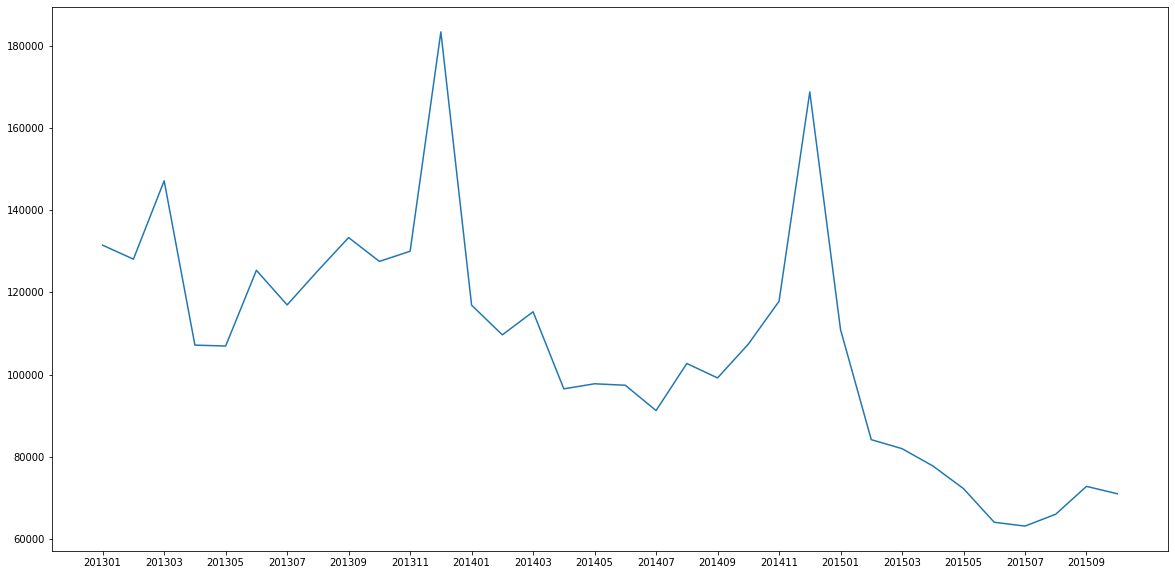

In [115]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(plot_df['year_month'], plot_df['item_cnt_day'])
ax.set_xticks(plot_df['year_month'][::2]);

<b>Daily sales</b>

In [116]:
total_sales_train_daily = sales_train_df.groupby(['date']).agg({'item_cnt_day': 'sum'}).reset_index()
plot_df = total_sales_train_daily.copy()
plot_df['date'] = plot_df['date'].astype(str)

In [117]:
plot_df['smoothed_item_cnt_day'] = plot_df['item_cnt_day'].rolling(window=7).mean()

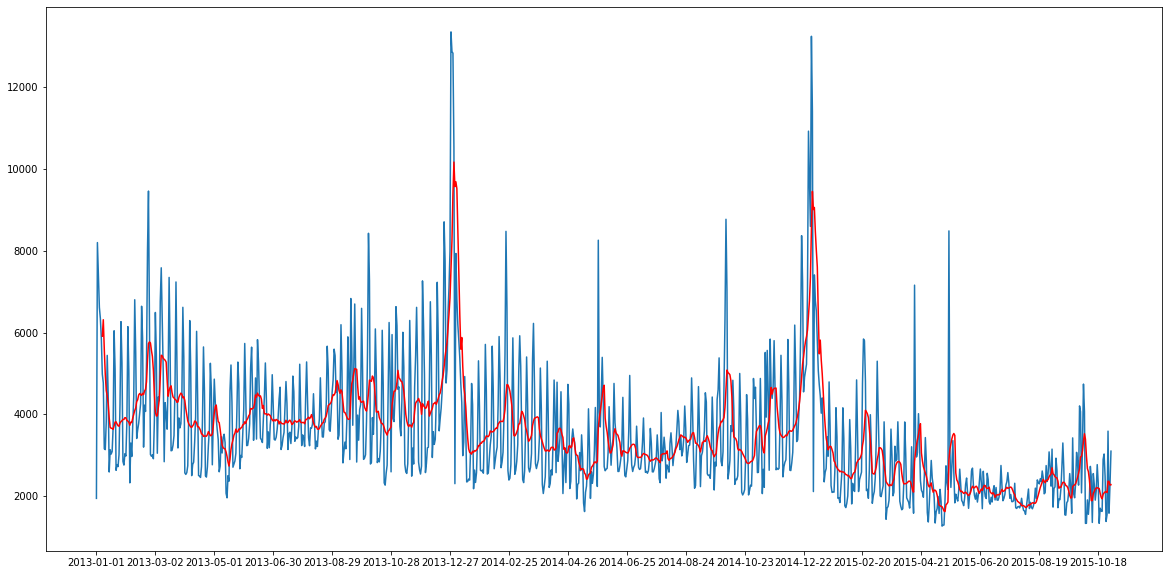

In [118]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(plot_df['date'], plot_df['item_cnt_day'])
ax.plot(plot_df['date'], plot_df['smoothed_item_cnt_day'], c='r')
ax.set_xticks(plot_df['date'][::60]);

<b>Year wise sales</b> - daily

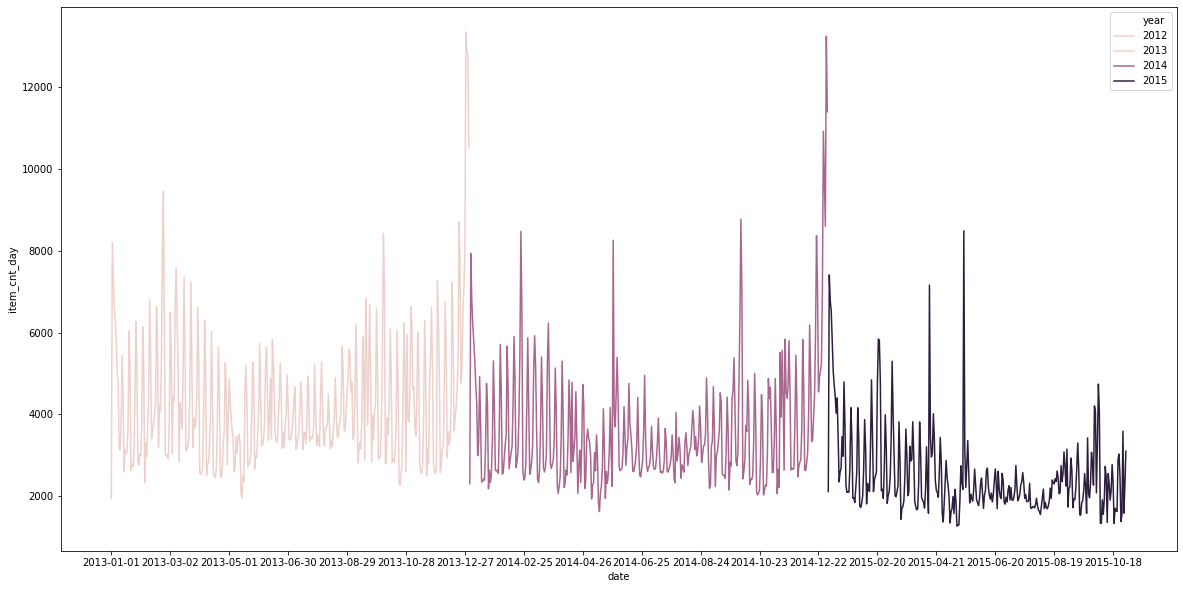

In [132]:
# fig, ax = plt.subplots(figsize=(20,10))
plot_df = total_sales_train_daily.copy()
plot_df['year'] = plot_df['date'].dt.year
plot_df['month'] = plot_df['date'].dt.month
plot_df['date'] = plot_df['date'].astype(str)
# _, ax = plt.subplots(figsize=(20,10));
ax = sns.lineplot(data=plot_df, x='date', y='item_cnt_day', hue='year');
ax.set_xticks(plot_df['date'][::60]);

<b>Year wise sales</b> - monthly

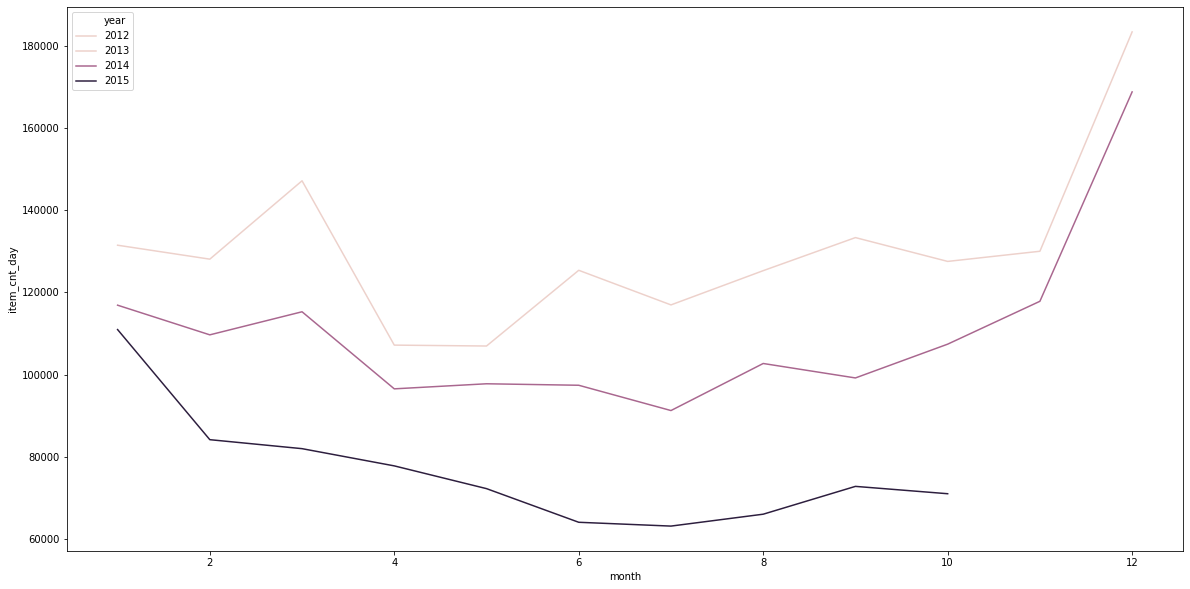

In [141]:
# fig, ax = plt.subplots(figsize=(20,10))
plot_df = sales_train_df.groupby(['year', 'month']).agg({'item_cnt_day': 'sum'}).reset_index()
_, ax = plt.subplots(figsize=(20,10));
sns.lineplot(data=plot_df, x='month', y='item_cnt_day', hue='year');
# ax.set_xticks(plot_df['date'][::60]);
# plot_df

# Explore sales and prices

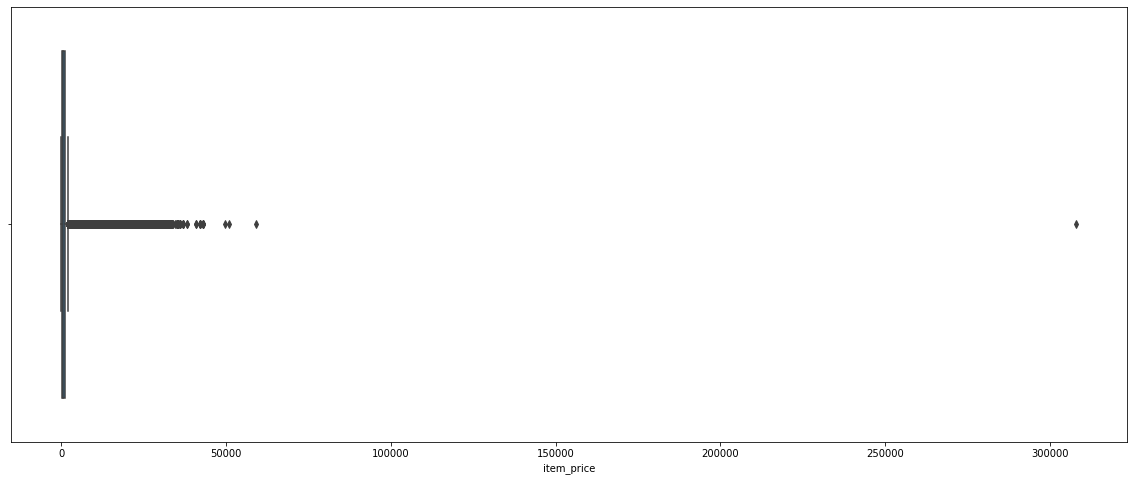

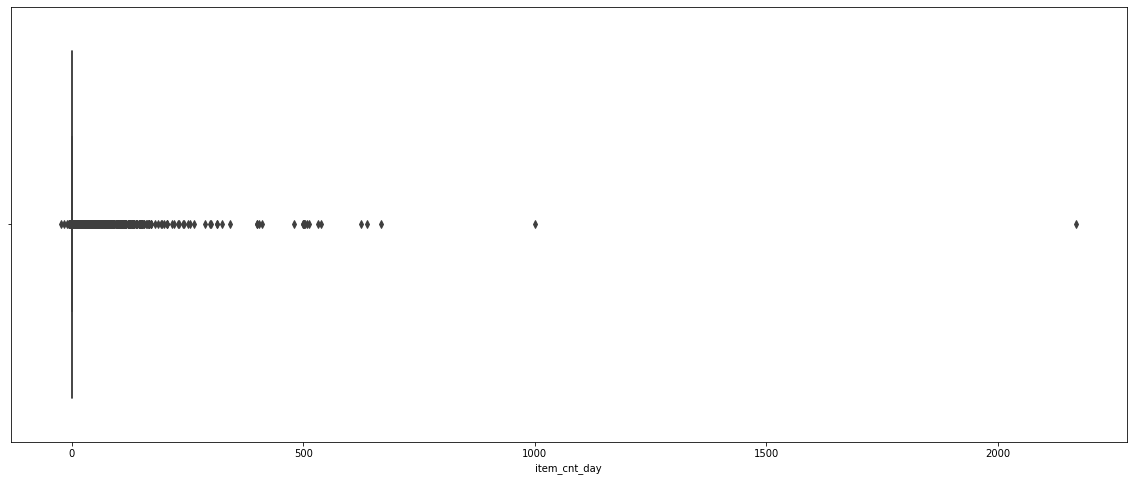

In [146]:
items_for_boxplot = ['item_price', 'item_cnt_day']
for item in items_for_boxplot:
    fig, ax = plt.subplots(figsize=(20,8))
    sns.boxplot(x=sales_train_df[item])

Let's take a look at the quantile values of the prices

In [151]:
display(sales_train_df['item_price'].quantile([0.25, 0.5, 0.75, 0.999]))
display(sales_train_df['item_cnt_day'].quantile([0.25, 0.5, 0.75, 0.999]))

0.250      249.0
0.500      399.0
0.750      999.0
0.999    23990.0
Name: item_price, dtype: float64

0.250     1.0
0.500     1.0
0.750     1.0
0.999    22.0
Name: item_cnt_day, dtype: float64

For modelling purposes, rows with values above 99.9 percentile shall be removed

In [164]:
sales_train_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,year_month,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,2.013777e+03,6.247717e+00,1.585267e+01,2.013839e+05,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,7.684790e-01,3.536219e+00,8.923483e+00,7.645367e+01,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,2.013000e+03,1.000000e+00,1.000000e+00,2.013010e+05,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,2.013080e+05,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.014030e+05,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,2.014000e+03,9.000000e+00,2.400000e+01,2.014120e+05,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,2.015000e+03,1.200000e+01,3.100000e+01,2.015100e+05,8.300000e+01


There seems to be some negative values for both item_price and item_cnt_day. These should also be removed

# Explore shop details

In [167]:
shops_df.columns

Index(['shop_name', 'shop_id'], dtype='object')

In [169]:
shops_df['shop_name'].unique()

array(['!Якутск Орджоникидзе, 56 фран', '!Якутск ТЦ "Центральный" фран',
       'Адыгея ТЦ "Мега"', 'Балашиха ТРК "Октябрь-Киномир"',
       'Волжский ТЦ "Волга Молл"', 'Вологда ТРЦ "Мармелад"',
       'Воронеж (Плехановская, 13)', 'Воронеж ТРЦ "Максимир"',
       'Воронеж ТРЦ Сити-Парк "Град"', 'Выездная Торговля',
       'Жуковский ул. Чкалова 39м?', 'Жуковский ул. Чкалова 39м²',
       'Интернет-магазин ЧС', 'Казань ТЦ "Бехетле"',
       'Казань ТЦ "ПаркХаус" II', 'Калуга ТРЦ "XXI век"',
       'Коломна ТЦ "Рио"', 'Красноярск ТЦ "Взлетка Плаза"',
       'Красноярск ТЦ "Июнь"', 'Курск ТЦ "Пушкинский"',
       'Москва "Распродажа"', 'Москва МТРЦ "Афи Молл"',
       'Москва Магазин С21', 'Москва ТК "Буденовский" (пав.А2)',
       'Москва ТК "Буденовский" (пав.К7)', 'Москва ТРК "Атриум"',
       'Москва ТЦ "Ареал" (Беляево)', 'Москва ТЦ "МЕГА Белая Дача II"',
       'Москва ТЦ "МЕГА Теплый Стан" II',
       'Москва ТЦ "Новый век" (Новокосино)', 'Москва ТЦ "Перловский"',
       'Москва Т

The translations of the above Russian names are below:

! Yakutsk Ordzhonikidze, 56 francs', '! Yakutsk TC "Central" fran',
       'Adygea shopping center "Mega"', 'Balashikha shopping center "October-Kinomir"',
       'Volzhsky shopping center "Volga Mall"', 'Vologda shopping center "Marmelad"',
       'Voronezh (Plekhanovskaya, 13)', 'Voronezh SEC "Maksimir"',
       'Voronezh SEC City-Park' Grad '', 'Outbound Trade',
       'Zhukovsky st. Chkalov 39m? ',' Zhukovsky st. Chkalov 39m² ',
       'Online store of emergency situations', 'Kazan TC "Behetle"',
       'Kazan' ParkHouse 'shopping center II', 'Kaluga' XXI century 'shopping center',
       'Kolomna shopping center "Rio"', 'Krasnoyarsk shopping center "Vzletka Plaza"',
       'Krasnoyarsk shopping center "June"', 'Kursk shopping center "Pushkinsky"',
       'Moscow "Sale"', 'Moscow MTRC "Afi Mall"',
       'Moscow Shop C21', 'Moscow TC "Budenovskiy" (pav. A2)',
       'Moscow TC "Budenovskiy" (pav. K7)', 'Moscow SEC "Atrium"',
       'Moscow TC "Areal" (Belyaevo)', 'Moscow TC "MEGA Belaya Dacha II"',
       'Moscow TC "MEGA Teply Stan" II',
       'Moscow shopping center "New Age" (Novokosino)', 'Moscow shopping center "Perlovsky"',
       'Moscow shopping center "Semenovsky"', 'Moscow shopping center "Silver House"',
       'Mytischi SEC "XL-3"', 'N. Novgorod SEC "RIO"',
       'N.Novgorod SEC "Fantasy"',
       'Novosibirsk SEC "Gallery Novosibirsk"', 'Novosibirsk SEC "Mega"',
       'Omsk shopping center "Mega"', 'Rostov-on-Don shopping center "Megacenter Horizon"',
       'Rostov-on-Don shopping mall' Megacenter Horizon 'Ostrovnoy',
       'Rostov-on-Don shopping center' Mega '', 'St. Petersburg shopping center' Nevsky Center '',
       'SPb TC "Sennaya"', 'Samara TC "Melody"', 'Samara TC "ParkHouse"',
       'Sergiev Posad' 7Ya 'shopping center', 'Surgut' City Mall 'shopping center',
       'Tomsk SEC "Emerald City"', 'Tyumen SEC "Crystal"',
       'Tyumen shopping center Goodwin', 'Tyumen shopping center Zeleny Bereg',
       'Ufa TC "Central"', 'Ufa TC "Family" 2', 'Khimki TC "Mega"',
       'Digital warehouse 1C-Online', 'Chekhov SEC "Carnival"',
       'Yakutsk Ordzhonikidze, 56', 'Yakutsk TC "Central"',
       'Yaroslavl' Altair 'shopping center

Translating the above names and inspection reveals that few names are identical to each other. For instance, see below:

In [190]:
shops = shops_df['shop_name'].unique()
display(shops[0] ,shops[57])
display(shops[1], shops[58])
display(shops[10], shops[11])

'!Якутск Орджоникидзе, 56 фран'

'Якутск Орджоникидзе, 56'

'!Якутск ТЦ "Центральный" фран'

'Якутск ТЦ "Центральный"'

'Жуковский ул. Чкалова 39м?'

'Жуковский ул. Чкалова 39м²'

These duplicats should be replaced with the same ID while pre-processing the data

Additionally, it can be observed from the translations above that the shop name always starts with the city name. These can be extracted as a feature

In [191]:
shops_df['city'] = shops_df['shop_name'].apply(lambda x: x.split()[0])

In [194]:
display(shops_df['city'].unique())
display(len(shops_df['city'].unique()))

array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Якутск', 'Ярославль'], dtype=object)

32

The first two city names have a '!' at the front. This can be removed

In [196]:
shops_df.loc[shops_df['city'] == '!Якутск', 'city'] = 'Якутск'

In [197]:
display(shops_df['city'].unique())
display(len(shops_df['city'].unique()))

array(['Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Ярославль'], dtype=object)

31

The city names can be label encoded while feature engineering

# Explore item categories data

In [199]:
item_cat_df.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [200]:
item_cat_df['item_category_name'].unique()

array(['PC - Гарнитуры/Наушники', 'Аксессуары - PS2', 'Аксессуары - PS3',
       'Аксессуары - PS4', 'Аксессуары - PSP', 'Аксессуары - PSVita',
       'Аксессуары - XBOX 360', 'Аксессуары - XBOX ONE', 'Билеты (Цифра)',
       'Доставка товара', 'Игровые консоли - PS2',
       'Игровые консоли - PS3', 'Игровые консоли - PS4',
       'Игровые консоли - PSP', 'Игровые консоли - PSVita',
       'Игровые консоли - XBOX 360', 'Игровые консоли - XBOX ONE',
       'Игровые консоли - Прочие', 'Игры - PS2', 'Игры - PS3',
       'Игры - PS4', 'Игры - PSP', 'Игры - PSVita', 'Игры - XBOX 360',
       'Игры - XBOX ONE', 'Игры - Аксессуары для игр',
       'Игры Android - Цифра', 'Игры MAC - Цифра',
       'Игры PC - Дополнительные издания',
       'Игры PC - Коллекционные издания', 'Игры PC - Стандартные издания',
       'Игры PC - Цифра', 'Карты оплаты (Кино, Музыка, Игры)',
       'Карты оплаты - Live!', 'Карты оплаты - Live! (Цифра)',
       'Карты оплаты - PSN', 'Карты оплаты - Windows (Цифра)',

Translatign the above names gives the following:

PC - Headsets / Headphones', 'Accessories - PS2', 'Accessories - PS3',
       'Accessories - PS4', 'Accessories - PSP', 'Accessories - PSVita',
       'Accessories - XBOX 360', 'Accessories - XBOX ONE', 'Tickets (Number)',
       'Delivery of goods', 'Game consoles - PS2',
       'Game consoles - PS3', 'Game consoles - PS4',
       'Game consoles - PSP', 'Game consoles - PSVita',
       'Game consoles - XBOX 360', 'Game consoles - XBOX ONE',
       'Game consoles - Other', 'Games - PS2', 'Games - PS3',
       'Games - PS4', 'Games - PSP', 'Games - PSVita', 'Games - XBOX 360',
       'Games - XBOX ONE', 'Games - Game Accessories',
       'Android Games - Number', 'MAC Games - Number',
       'PC Games - Additional Editions',
       'PC Games - Collector's Editions', 'PC Games - Standard Editions',
       'PC Games - Number', 'Payment Cards (Cinema, Music, Games)',
       'Payment cards - Live!', 'Payment cards - Live! (Numeral)',
       'Payment cards - PSN', 'Payment cards - Windows (Digital)',
       'Cinema - Blu-Ray', 'Cinema - Blu-Ray 3D', 'Cinema - Blu-Ray 4K',
       'Cinema - DVD', 'Cinema - Collector's',
       'Books - Artbooks, encyclopedias', 'Books - Audiobooks',
       'Books - Audiobooks (Digital)', 'Books - Audiobooks 1C',
       'Books - Business Literature', 'Books - Comics, Manga',
       'Books - Computer Literature',
       'Books - Methodical materials 1C', 'Books - Postcards',
       'Books - Educational Literature', 'Books - Guides',
       'Books - Fiction', 'Books - Number',
       'Music - locally produced CD',
       'Music - branded CD', 'Music - MP3',
       'Music - Vinyl', 'Music - Music Video',
       'Music - Gift Editions', 'Gifts - Attributes',
       'Gifts - Gadgets, Robots, Sports', 'Gifts - Soft Toys',
       'Gifts - Board Games',
       'Gifts - Board Games (compact)',
       'Gifts - Postcards, stickers', 'Gifts - Development',
       'Gifts - Certificates, Services', 'Gifts - Souvenirs',
       'Gifts - Souvenirs (hitch)',
       'Gifts - Bags, Albums, Mouse Pads', 'Gifts - Figures',
       'Programs - 1C: Enterprise 8', 'Programs - MAC (Digit)',
       'Programs - For Home and Office',
       'Programs - For Home and Office (Digital)', 'Programs - Educational',
       'Programs - Educational (Digital)', 'Service', 'Service - Tickets',
       'Blank media (pin)', 'Blank media (piece)',
       'Batteries'

It appears that the item category names are composed of generalised category following by a more specific sub type name, both separated by a '-'. This can be extracted

In [208]:
item_cat_df['split'] = item_cat_df['item_category_name'].str.split('-')
item_cat_df['item_type'] = item_cat_df['split'].apply(lambda x: x[0].strip())

In [209]:
item_cat_df['item_type'].unique()

array(['PC', 'Аксессуары', 'Билеты (Цифра)', 'Доставка товара',
       'Игровые консоли', 'Игры', 'Игры Android', 'Игры MAC', 'Игры PC',
       'Карты оплаты (Кино, Музыка, Игры)', 'Карты оплаты', 'Кино',
       'Книги', 'Музыка', 'Подарки', 'Программы', 'Служебные',
       'Чистые носители (шпиль)', 'Чистые носители (штучные)',
       'Элементы питания'], dtype=object)

In [215]:
item_cat_df['item_sub_type'] = item_cat_df['split'].apply(lambda x: x[1].strip() if len(x) > 1 else x[0])
item_cat_df['item_sub_type'].unique()

array(['Гарнитуры/Наушники', 'PS2', 'PS3', 'PS4', 'PSP', 'PSVita',
       'XBOX 360', 'XBOX ONE', 'Билеты (Цифра)', 'Доставка товара',
       'Прочие', 'Аксессуары для игр', 'Цифра', 'Дополнительные издания',
       'Коллекционные издания', 'Стандартные издания',
       'Карты оплаты (Кино, Музыка, Игры)', 'Live!', 'Live! (Цифра)',
       'PSN', 'Windows (Цифра)', 'Blu', 'DVD', 'Коллекционное',
       'Артбуки, энциклопедии', 'Аудиокниги', 'Аудиокниги (Цифра)',
       'Аудиокниги 1С', 'Бизнес литература', 'Комиксы, манга',
       'Компьютерная литература', 'Методические материалы 1С', 'Открытки',
       'Познавательная литература', 'Путеводители',
       'Художественная литература', 'CD локального производства',
       'CD фирменного производства', 'MP3', 'Винил', 'Музыкальное видео',
       'Подарочные издания', 'Атрибутика', 'Гаджеты, роботы, спорт',
       'Мягкие игрушки', 'Настольные игры',
       'Настольные игры (компактные)', 'Открытки, наклейки', 'Развитие',
       'Сертификат

The above names translates to the following

Headsets / Headphones', 'PS2', 'PS3', 'PS4', 'PSP', 'PSVita',
       'XBOX 360', 'XBOX ONE', 'Tickets (Digit)', 'Delivery of goods',
       'Other', 'Accessories for games', 'Number', 'Additional editions',
       'Collector's Editions', 'Standard Editions',
       'Payment cards (Cinema, Music, Games)', 'Live!', 'Live! (Numeral)',
       'PSN', 'Windows (Digital)', 'Blu', 'DVD', 'Collectible',
       'Artbooks, Encyclopedias', 'Audiobooks', 'Audiobooks (Digital)',
       'Audiobooks 1C', 'Business literature', 'Comics, manga',
       'Computer literature', 'Methodological materials 1C', 'Postcards',
       'Educational literature', 'Guides',
       'Fiction', 'Local CDs',
       'Brand CD', 'MP3', 'Vinyl', 'Music Video',
       'Gift Editions', 'Attributes', 'Gadgets, Robots, Sports',
       'Stuffed Toys', 'Board Games',
       'Board games (compact)', 'Postcards, stickers', 'Development',
       'Certificates, services', 'Souvenirs', 'Souvenirs (hinged)',
       'Bags, Albums, Mousepads', 'Figures', '1C: Enterprise 8',
       'MAC (Digit)', 'Home & Office', 'Home & Office (Digit)',
       'Educational', 'Educational (Digit)', 'Service', 'Tickets',
       'Blank media (pin)', 'Blank media (piece)',
       'Batteries'

Looks good so far. The item types and sub types can be created as features

In [227]:
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [249]:
unique_item_ids = set()
unique_shop_ids = set()
for id_block in range(34):
    month_data = sales_train_df[sales_train_df['date_block_num'] == id_block]
    monthly_unique_item_ids = set(month_data['item_id'].unique())
    print(f'there are {len(monthly_unique_item_ids)} unique items sold in month {id_block}')
    unique_item_ids = unique_item_ids.union(monthly_unique_item_ids)
    print(f'total unique item ids found so far {len(unique_item_ids)}')
    
    monthly_unique_shop_ids = set(month_data['shop_id'].unique())
    print(f'there are {len(monthly_unique_shop_ids)} unique shops in month {id_block}')
    unique_shop_ids = unique_shop_ids.union(monthly_unique_shop_ids)
    print(f'total unique shop ids found so far {len(unique_shop_ids)}')

there are 8115 unique items sold in month 0
total unique item ids found so far 8115
there are 45 unique shops in month 0
total unique shop ids found so far 45
there are 8168 unique items sold in month 1
total unique item ids found so far 9352
there are 46 unique shops in month 1
total unique shop ids found so far 46
there are 8302 unique items sold in month 2
total unique item ids found so far 10150
there are 46 unique shops in month 2
total unique shop ids found so far 48
there are 8145 unique items sold in month 3
total unique item ids found so far 10778
there are 46 unique shops in month 3
total unique shop ids found so far 48
there are 8339 unique items sold in month 4
total unique item ids found so far 11460
there are 45 unique shops in month 4
total unique shop ids found so far 49
there are 8478 unique items sold in month 5
total unique item ids found so far 11991
there are 46 unique shops in month 5
total unique shop ids found so far 50
there are 8405 unique items sold in month 

Looks like there are new item ids sold each month starting from the first month. The unique shop IDs also has increased over time

In [252]:
print('the number of unique shop IDs in the test data frame is ', len(test_df['shop_id'].unique()))
print('the number of unique item IDs in the test data frame is ', len(test_df['item_id'].unique()))
print('total size of test dataframe is ', test_df.shape[0])

the number of unique shop IDs in the test data frame is  42
the number of unique item IDs in the test data frame is  5100
total size of test dataframe is  214200


It seems test dataframe is composed of a unique combination of each Item id and shop ID found in the dataframe